In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env

In [2]:
import sklearn

In [3]:
def split(df, stratify_by= None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=319)
        train, validate = train_test_split(train, test_size=.3, random_state=319)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=319, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=319, stratify=train[stratify_by])
    return train, validate, test

In [4]:
def seperate_y(train, validate, test):
    '''
    This function will take the train, validate, and test dataframes and seperate the target variable into its
    own panda series
    '''
    X_train = train.drop(columns=['logerror'])
    y_train = train.logerror
    X_validate = validate.drop(columns=['logerror'])
    y_validate = validate.logerror
    X_test = test.drop(columns=['logerror'])
    y_test = test.logerror
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [5]:
def scale_data(X_train, X_validate, X_test):
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    obj_col = ['fips', 'yearbuilt', 'airconditioningdesc', 'heatingorsystemdesc', 'transactiondate', 'bath_bed_ratio']
    
    num_train = X_train.drop(columns = obj_col)
    num_validate = X_validate.drop(columns = obj_col)
    num_test = X_test.drop(columns = obj_col)
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    # We fit on the training data
    # we only .fit on the training data
    scaler.fit(num_train)
    train_scaled = scaler.transform(num_train)
    validate_scaled = scaler.transform(num_validate)
    test_scaled = scaler.transform(num_test)
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=num_train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=num_train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=num_train.columns)
    return train_scaled, validate_scaled, test_scaled

In [6]:
import wrangle

from wrangle import get_zillow_data

In [7]:
from wrangle import clean_zillow

In [8]:
df = pd.read_csv('zillowcluster_df.csv')

In [9]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [10]:
df.shape

(77413, 68)

In [11]:
clean_df = clean_zillow(df)

In [12]:
clean_df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.33,0.00,1.23,0.67,0.21,0.30,0.50,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.33,0.00,1.23,0.50,0.21,0.30,0.40,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.33,0.00,1.23,0.50,0.22,0.30,0.40,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.47,0.00,1.43,0.67,0.26,0.30,0.30,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.47,0.00,1.26,0.50,0.26,0.30,0.40,1,0,0


In [13]:
clean_df.shape

(73150, 30)

In [14]:
train, validate, test = split(clean_df)

In [15]:
train.shape

(40964, 30)

In [16]:
validate.shape

(17556, 30)

In [17]:
test.shape

(14630, 30)

In [18]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [19]:
X_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12290362,7.00,5.00,1.00,2.00,934.00,6037,33.90,-118.19,"6,968.00",0.00,...,0.53,0.00,1.85,0.50,0.16,0.20,0.10,1,0,0
11454739,2.00,1.00,2.00,2.00,"1,140.00",6037,33.98,-118.38,"7,280.00",1.00,...,0.13,0.00,1.22,1.00,0.17,0.20,0.20,1,0,0
10794853,2.00,1.00,2.00,2.00,"1,050.00",6037,34.18,-118.60,"134,581.00",1.00,...,0.13,0.00,1.21,1.00,3.09,0.50,0.20,1,0,0
13065298,7.00,5.00,1.00,3.00,"1,081.00",6037,34.06,-117.80,"7,207.00",0.00,...,0.47,0.00,2.13,0.33,0.17,0.20,0.20,1,0,0
12554566,2.00,1.00,1.00,3.00,"1,511.00",6037,33.78,-118.19,"46,277.00",0.00,...,0.13,0.00,1.23,inf,1.06,0.50,0.40,1,0,0


In [20]:
X_train.shape

(40964, 29)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40964 entries, 12290362 to 14696354
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         40964 non-null  float64       
 1   airconditioningtypeid         40964 non-null  float64       
 2   bathroomcnt                   40964 non-null  float64       
 3   bedroomcnt                    40964 non-null  float64       
 4   calculatedfinishedsquarefeet  40964 non-null  float64       
 5   fips                          40964 non-null  object        
 6   latitude                      40964 non-null  float64       
 7   longitude                     40964 non-null  float64       
 8   lotsizesquarefeet             40964 non-null  float64       
 9   poolcnt                       40964 non-null  float64       
 10  roomcnt                       40964 non-null  float64       
 11  yearbuilt         

In [22]:
X_train.isnull().sum()

heatingorsystemtypeid           0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
roomcnt                         0
yearbuilt                       0
fireplaceflag                   0
taxvaluedollarcnt               0
taxamount                       0
transactiondate                 0
airconditioningdesc             0
heatingorsystemdesc             0
age_of_home                     0
age_bin                         0
baths_per_sqft                  0
taxrate                         0
bath_bed_ratio                  0
acres                           0
acres_bin                       0
sqft_bin                        0
la_county                       0
orange_county                   0
ventura_county                  0
dtype: int64

In [23]:
y_train.shape

(40964,)

In [24]:
y_train.head()

parcelid
12290362                   0.04
11454739                   0.01
10794853                   0.02
13065298                  -0.04
12554566                  -0.01
Name: logerror, dtype: float64

In [25]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [26]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.26,0.33,0.00,0.10,0.09,0.38,0.67,0.00,0.00,0.00,...,0.54,0.57,0.09,0.06,0.00,0.22,0.11,1.00,0.00,0.00
1,0.04,0.00,0.11,0.10,0.12,0.43,0.57,0.00,1.00,0.00,...,0.04,0.14,0.14,0.04,0.00,0.22,0.22,1.00,0.00,0.00
2,0.04,0.00,0.11,0.10,0.10,0.57,0.46,0.02,1.00,0.00,...,0.04,0.14,0.16,0.04,0.02,0.56,0.22,1.00,0.00,0.00
3,0.26,0.33,0.00,0.20,0.11,0.49,0.87,0.00,0.00,0.00,...,0.47,0.50,0.08,0.07,0.00,0.22,0.22,1.00,0.00,0.00
4,0.04,0.00,0.00,0.20,0.16,0.30,0.67,0.01,0.00,0.00,...,0.08,0.14,0.05,0.04,0.01,0.56,0.44,1.00,0.00,0.00


In [27]:
validate_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.04,0.33,0.22,0.10,0.22,0.50,0.48,0.04,0.00,0.00,...,0.28,0.36,0.13,0.04,0.04,0.67,0.44,1.00,0.00,0.00
1,0.26,0.33,0.00,0.10,0.05,0.53,0.67,0.00,0.00,0.00,...,0.71,0.71,0.12,0.04,0.00,0.11,0.00,1.00,0.00,0.00
2,0.00,0.33,0.17,0.20,0.19,0.14,0.96,0.00,0.00,0.00,...,0.10,0.14,0.12,0.05,0.00,0.22,0.44,0.00,1.00,0.00
3,0.04,0.33,0.22,0.20,0.23,0.53,0.71,0.00,1.00,0.00,...,0.57,0.64,0.12,0.05,0.00,0.33,0.44,1.00,0.00,0.00
4,0.00,0.33,0.22,0.20,0.16,0.57,0.15,0.00,0.00,0.36,...,0.34,0.43,0.17,0.04,0.00,0.00,0.33,0.00,0.00,1.00


In [28]:
test_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,0.33,0.11,0.10,0.12,0.40,0.79,0.00,0.00,0.00,...,0.24,0.29,0.14,0.04,0.00,0.22,0.22,0.00,1.00,0.00
1,0.04,0.33,0.11,0.20,0.17,0.60,0.52,0.00,0.00,0.00,...,0.43,0.50,0.10,0.05,0.00,0.22,0.44,1.00,0.00,0.00
2,0.00,0.33,0.00,0.00,0.02,0.21,0.99,0.00,0.00,0.00,...,0.22,0.29,0.20,0.05,0.00,0.22,0.00,0.00,1.00,0.00
3,0.04,0.00,0.22,0.20,0.31,0.29,0.71,0.00,1.00,0.00,...,0.26,0.29,0.09,0.04,0.00,0.00,0.67,1.00,0.00,0.00
4,0.00,0.33,0.11,0.20,0.22,0.29,0.83,0.00,0.00,0.43,...,0.47,0.50,0.08,0.04,0.00,0.22,0.44,0.00,1.00,0.00


In [29]:
def split_seperate_scale(df, stratify_by= None):
    
    '''
    This function will take in a dataframe
    
    seperate the dataframe into train, validate, and test dataframes
    
    seperate the target variable from train, validate and test
    
    then it will scale the numeric variables in train, validate, and test
    
    finally it will return all dataframes individually
    '''
    
    # split data into train, validate, test
    split(df, stratify_by= None)
    
    # seperate target variable
    seperate_y(train, validate, test)
    
    # scale numeric variable
    scale_data(X_train, X_validate, X_test)
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled



In [30]:
df2 = pd.read_csv('zillowcluster_df.csv')

In [31]:
df2.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [32]:
df2.shape

(77413, 68)

In [33]:
train2, validate2, test2, X_train2, y_train2, X_validate2, y_validate2, X_test2, y_test2, train_scaled2, validate_scaled2, test_scaled2 = split_seperate_scale(df2)

In [34]:
train2.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12290362,7.00,5.00,1.00,2.00,934.00,6037,33.90,-118.19,"6,968.00",0.00,...,0.53,0.00,1.85,0.50,0.16,0.20,0.10,1,0,0
11454739,2.00,1.00,2.00,2.00,"1,140.00",6037,33.98,-118.38,"7,280.00",1.00,...,0.13,0.00,1.22,1.00,0.17,0.20,0.20,1,0,0
10794853,2.00,1.00,2.00,2.00,"1,050.00",6037,34.18,-118.60,"134,581.00",1.00,...,0.13,0.00,1.21,1.00,3.09,0.50,0.20,1,0,0
13065298,7.00,5.00,1.00,3.00,"1,081.00",6037,34.06,-117.80,"7,207.00",0.00,...,0.47,0.00,2.13,0.33,0.17,0.20,0.20,1,0,0
12554566,2.00,1.00,1.00,3.00,"1,511.00",6037,33.78,-118.19,"46,277.00",0.00,...,0.13,0.00,1.23,inf,1.06,0.50,0.40,1,0,0


In [35]:
train2.shape

(40964, 30)

In [36]:
validate2.shape

(17556, 30)

In [37]:
test2.shape

(14630, 30)

In [38]:
X_train2.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12290362,7.00,5.00,1.00,2.00,934.00,6037,33.90,-118.19,"6,968.00",0.00,...,0.53,0.00,1.85,0.50,0.16,0.20,0.10,1,0,0
11454739,2.00,1.00,2.00,2.00,"1,140.00",6037,33.98,-118.38,"7,280.00",1.00,...,0.13,0.00,1.22,1.00,0.17,0.20,0.20,1,0,0
10794853,2.00,1.00,2.00,2.00,"1,050.00",6037,34.18,-118.60,"134,581.00",1.00,...,0.13,0.00,1.21,1.00,3.09,0.50,0.20,1,0,0
13065298,7.00,5.00,1.00,3.00,"1,081.00",6037,34.06,-117.80,"7,207.00",0.00,...,0.47,0.00,2.13,0.33,0.17,0.20,0.20,1,0,0
12554566,2.00,1.00,1.00,3.00,"1,511.00",6037,33.78,-118.19,"46,277.00",0.00,...,0.13,0.00,1.23,inf,1.06,0.50,0.40,1,0,0


In [39]:
X_train2.shape

(40964, 29)

In [40]:
y_train2.head()

parcelid
12290362                   0.04
11454739                   0.01
10794853                   0.02
13065298                  -0.04
12554566                  -0.01
Name: logerror, dtype: float64

In [41]:
y_train2.shape

(40964,)

In [42]:
X_validate2.shape

(17556, 29)

In [43]:
y_validate2.shape

(17556,)

In [44]:
X_test2.shape

(14630, 29)

In [45]:
y_test2.shape

(14630,)

In [46]:
train_scaled2.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.26,0.33,0.00,0.10,0.09,0.38,0.67,0.00,0.00,0.00,...,0.54,0.57,0.09,0.06,0.00,0.22,0.11,1.00,0.00,0.00
1,0.04,0.00,0.11,0.10,0.12,0.43,0.57,0.00,1.00,0.00,...,0.04,0.14,0.14,0.04,0.00,0.22,0.22,1.00,0.00,0.00
2,0.04,0.00,0.11,0.10,0.10,0.57,0.46,0.02,1.00,0.00,...,0.04,0.14,0.16,0.04,0.02,0.56,0.22,1.00,0.00,0.00
3,0.26,0.33,0.00,0.20,0.11,0.49,0.87,0.00,0.00,0.00,...,0.47,0.50,0.08,0.07,0.00,0.22,0.22,1.00,0.00,0.00
4,0.04,0.00,0.00,0.20,0.16,0.30,0.67,0.01,0.00,0.00,...,0.08,0.14,0.05,0.04,0.01,0.56,0.44,1.00,0.00,0.00


In [47]:
train_scaled2.shape

(40964, 23)

In [48]:
validate_scaled2.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.04,0.33,0.22,0.10,0.22,0.50,0.48,0.04,0.00,0.00,...,0.28,0.36,0.13,0.04,0.04,0.67,0.44,1.00,0.00,0.00
1,0.26,0.33,0.00,0.10,0.05,0.53,0.67,0.00,0.00,0.00,...,0.71,0.71,0.12,0.04,0.00,0.11,0.00,1.00,0.00,0.00
2,0.00,0.33,0.17,0.20,0.19,0.14,0.96,0.00,0.00,0.00,...,0.10,0.14,0.12,0.05,0.00,0.22,0.44,0.00,1.00,0.00
3,0.04,0.33,0.22,0.20,0.23,0.53,0.71,0.00,1.00,0.00,...,0.57,0.64,0.12,0.05,0.00,0.33,0.44,1.00,0.00,0.00
4,0.00,0.33,0.22,0.20,0.16,0.57,0.15,0.00,0.00,0.36,...,0.34,0.43,0.17,0.04,0.00,0.00,0.33,0.00,0.00,1.00


In [49]:
validate_scaled2.shape

(17556, 23)

In [50]:
test_scaled2.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,0.33,0.11,0.10,0.12,0.40,0.79,0.00,0.00,0.00,...,0.24,0.29,0.14,0.04,0.00,0.22,0.22,0.00,1.00,0.00
1,0.04,0.33,0.11,0.20,0.17,0.60,0.52,0.00,0.00,0.00,...,0.43,0.50,0.10,0.05,0.00,0.22,0.44,1.00,0.00,0.00
2,0.00,0.33,0.00,0.00,0.02,0.21,0.99,0.00,0.00,0.00,...,0.22,0.29,0.20,0.05,0.00,0.22,0.00,0.00,1.00,0.00
3,0.04,0.00,0.22,0.20,0.31,0.29,0.71,0.00,1.00,0.00,...,0.26,0.29,0.09,0.04,0.00,0.00,0.67,1.00,0.00,0.00
4,0.00,0.33,0.11,0.20,0.22,0.29,0.83,0.00,0.00,0.43,...,0.47,0.50,0.08,0.04,0.00,0.22,0.44,0.00,1.00,0.00


In [51]:
test_scaled2.shape

(14630, 23)

## Explore

In [52]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12290362,7.00,5.00,1.00,2.00,934.00,6037,33.90,-118.19,"6,968.00",0.00,...,0.53,0.00,1.85,0.50,0.16,0.20,0.10,1,0,0
11454739,2.00,1.00,2.00,2.00,"1,140.00",6037,33.98,-118.38,"7,280.00",1.00,...,0.13,0.00,1.22,1.00,0.17,0.20,0.20,1,0,0
10794853,2.00,1.00,2.00,2.00,"1,050.00",6037,34.18,-118.60,"134,581.00",1.00,...,0.13,0.00,1.21,1.00,3.09,0.50,0.20,1,0,0
13065298,7.00,5.00,1.00,3.00,"1,081.00",6037,34.06,-117.80,"7,207.00",0.00,...,0.47,0.00,2.13,0.33,0.17,0.20,0.20,1,0,0
12554566,2.00,1.00,1.00,3.00,"1,511.00",6037,33.78,-118.19,"46,277.00",0.00,...,0.13,0.00,1.23,inf,1.06,0.50,0.40,1,0,0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40964 entries, 12290362 to 14696354
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         40964 non-null  float64       
 1   airconditioningtypeid         40964 non-null  float64       
 2   bathroomcnt                   40964 non-null  float64       
 3   bedroomcnt                    40964 non-null  float64       
 4   calculatedfinishedsquarefeet  40964 non-null  float64       
 5   fips                          40964 non-null  object        
 6   latitude                      40964 non-null  float64       
 7   longitude                     40964 non-null  float64       
 8   lotsizesquarefeet             40964 non-null  float64       
 9   poolcnt                       40964 non-null  float64       
 10  roomcnt                       40964 non-null  float64       
 11  yearbuilt         

In [54]:
train.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,bath_bed_ratio,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
count,"40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00",...,"40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00","40,964.00"
mean,2.90,3.93,2.26,3.01,"1,723.87",34.01,-118.20,"28,495.25",0.21,1.53,...,0.37,0.00,1.31,inf,0.65,0.21,0.35,0.64,0.28,0.08
std,3.24,2.28,0.90,0.99,827.72,0.27,0.36,"121,919.83",0.41,2.85,...,0.15,0.00,0.42,nan,2.80,0.15,0.19,0.48,0.45,0.27
min,1.00,1.00,1.00,1.00,240.00,33.34,-119.48,435.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,2.00,2.00,"1,170.00",33.81,-118.42,"5,985.00",0.00,0.00,...,0.27,0.00,1.16,0.60,0.14,0.10,0.20,0.00,0.00,0.00
50%,2.00,5.00,2.00,3.00,"1,514.00",34.02,-118.17,"7,280.00",0.00,0.00,...,0.33,0.00,1.23,0.75,0.17,0.20,0.40,1.00,0.00,0.00
75%,2.00,5.00,3.00,4.00,"2,049.00",34.18,-117.92,"10,652.25",0.00,0.00,...,0.47,0.00,1.34,1.00,0.24,0.30,0.50,1.00,1.00,0.00
max,24.00,13.00,10.00,11.00,"7,970.00",34.81,-117.55,"6,971,010.00",1.00,14.00,...,0.93,0.01,29.49,inf,160.03,0.90,0.90,1.00,1.00,1.00


In [56]:
train = train.drop(columns = 'bath_bed_ratio')

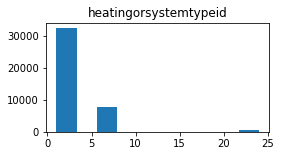

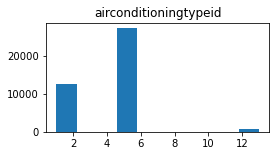

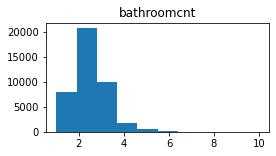

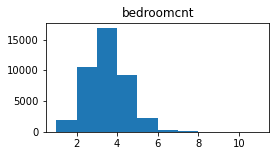

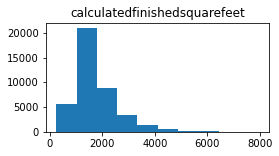

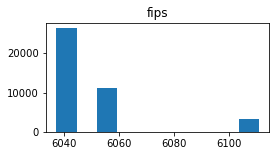

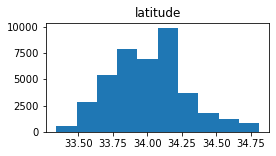

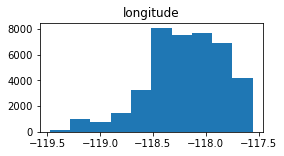

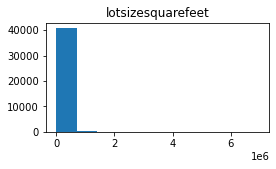

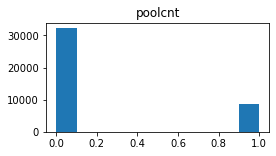

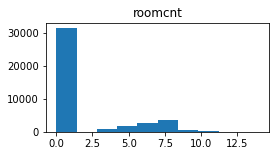

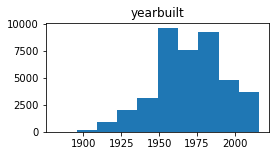

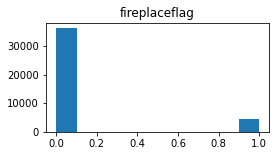

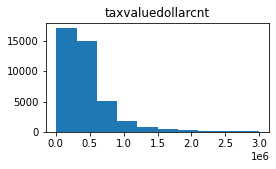

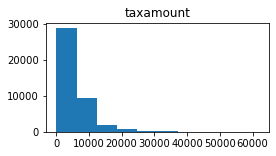

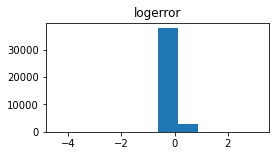

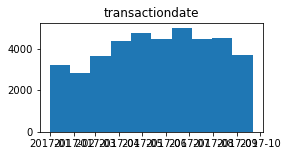

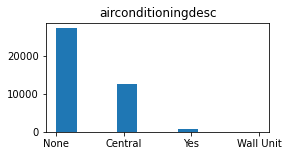

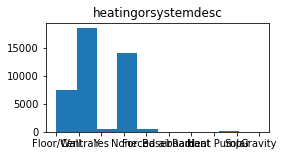

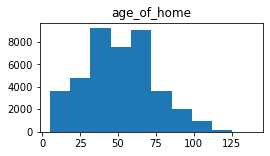

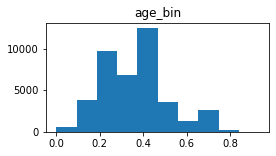

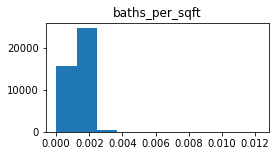

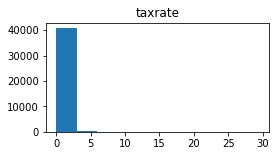

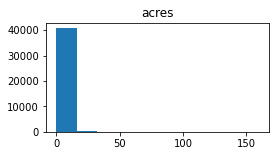

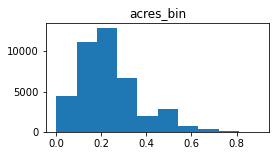

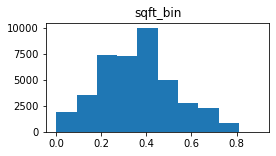

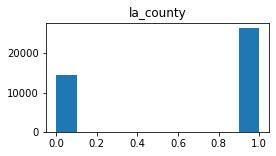

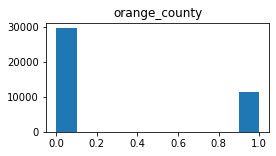

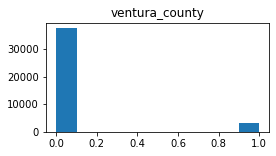

In [57]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways:

- most homes are in LA county

- may have some outliers 
    - tax rate
    - acres
    - logerror
    - tax amount
    - lot size square ft

- most bins have normal distribution

